Collaborative coding using GitHub
===========

Olivia Gawel, Sarah Phuong and Antón Vega

January 11th 2024


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd



## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [2]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [3]:
list(df.columns.values)

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

The above are names of columns that have varied characters, adn are hard to read. This is the reason why we need to clean and tidy the dataset, and create clear column names.

### **1. Cleaning and tidying the dataset**

This dataset entails information about Parkinson's subjects (n=31). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from 31 individuals that were tested.

In [4]:

# Define the renamevars function
def renamevars(df, dict_names):
    return df.rename(columns=dict_names)

# established names of all columns we have and which need renaming
dict_names = {
    'MDVP:Fo(Hz)': 'avFF',
    'MDVP:Fhi(Hz)': 'maxFF', 
    'MDVP:Flo(Hz)': 'minFF',
    'MDVP:Jitter(%)': 'percJitter',
    'MDVP:Jitter(Abs)': 'absJitter',
    'MDVP:RAP': 'rap',
    'MDVP:PPQ': 'ppq',
    'Jitter:DDP': 'ddp',
    'MDVP:Shimmer': 'lShimer',
    'MDVP:Shimmer(dB)': 'dbShimer',
    'Shimmer:APQ3': 'apq3',
    'Shimmer:APQ5': 'apq5',
    'MDVP:APQ': 'apq',
    'Shimmer:DDA': 'dda'
}

# loading dataset
file_path = 'parkinsons.data'
parkinsons_df = pd.read_csv(file_path)

# applying the renamevars function to the parkinsons dataset with the specified column name changes
renamed_parkinsons_df = renamevars(parkinsons_df, dict_names)

print(renamed_parkinsons_df.head(3))

             name     avFF    maxFF    minFF  percJitter  absJitter      rap  \
0  phon_R01_S01_1  119.992  157.302   74.997     0.00784    0.00007  0.00370   
1  phon_R01_S01_2  122.400  148.650  113.819     0.00968    0.00008  0.00465   
2  phon_R01_S01_3  116.682  131.111  111.555     0.01050    0.00009  0.00544   

       ppq      ddp  lShimer  ...      dda      NHR     HNR  status      RPDE  \
0  0.00554  0.01109  0.04374  ...  0.06545  0.02211  21.033       1  0.414783   
1  0.00696  0.01394  0.06134  ...  0.09403  0.01929  19.085       1  0.458359   
2  0.00781  0.01633  0.05233  ...  0.08270  0.01309  20.651       1  0.429895   

        DFA   spread1   spread2        D2       PPE  
0  0.815285 -4.813031  0.266482  2.301442  0.284654  
1  0.819521 -4.075192  0.335590  2.486855  0.368674  
2  0.825288 -4.443179  0.311173  2.342259  0.332634  

[3 rows x 24 columns]


In [5]:
# Now we have to splitting the 'name' column into separate components
aux = renamed_parkinsons_df.name.str.split('_', expand=True)

# dropping the first 2 columns as they are not needed (names and average FF)
aux.drop(aux.columns[[0, 1]], axis=1, inplace=True)

# renaming the remaining columns for better interpretation
aux.columns = ['subject_id', 'trial']

# adding these new columns back to the original DataFrame
renamed_parkinsons_df['subject_id'] = aux['subject_id']
renamed_parkinsons_df['trial'] = aux['trial']

# grouping by subject_id to count the number of trials per subject
summary = renamed_parkinsons_df.groupby('subject_id')['trial'].count().reset_index()
summary.columns = ['subject_id', 'trial_count']

# summary display
summary.head(10)


,subject_id,trial_count
0,S01,6
1,S02,6
2,S04,6
3,S05,6
4,S06,6
5,S07,6
6,S08,6
7,S10,6
8,S13,6
9,S16,6


In [6]:
renamed_parkinsons_df.head(2)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id,trial
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,2


In [7]:
# drop the 'name' column and 'avFF' (this means average fundamental frequency which is not relevant for our analysis)
renamed_parkinsons_df = renamed_parkinsons_df.drop(['name', 'avFF'], axis=1)

# display the first few rows of the dataframe to confirm the columns are dropped
print(renamed_parkinsons_df.head())

     maxFF    minFF  percJitter  absJitter      rap      ppq      ddp  \
0  157.302   74.997     0.00784    0.00007  0.00370  0.00554  0.01109   
1  148.650  113.819     0.00968    0.00008  0.00465  0.00696  0.01394   
2  131.111  111.555     0.01050    0.00009  0.00544  0.00781  0.01633   
3  137.871  111.366     0.00997    0.00009  0.00502  0.00698  0.01505   
4  141.781  110.655     0.01284    0.00011  0.00655  0.00908  0.01966   

   lShimer  dbShimer     apq3  ...     HNR  status      RPDE       DFA  \
0  0.04374     0.426  0.02182  ...  21.033       1  0.414783  0.815285   
1  0.06134     0.626  0.03134  ...  19.085       1  0.458359  0.819521   
2  0.05233     0.482  0.02757  ...  20.651       1  0.429895  0.825288   
3  0.05492     0.517  0.02924  ...  20.644       1  0.434969  0.819235   
4  0.06425     0.584  0.03490  ...  19.649       1  0.417356  0.823484   

    spread1   spread2        D2       PPE  subject_id  trial  
0 -4.813031  0.266482  2.301442  0.284654         S01

In [8]:
#current df available
renamed_parkinsons_df

,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,apq3,...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id,trial
0,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,1
1,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,2
2,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01,3
3,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01,4
4,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,...,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,S50,2
191,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,...,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,S50,3
192,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,...,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,S50,4
193,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,...,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,S50,5


**Question 1: Are there any correlations present in our data?**

In [9]:
# calculating the correlation matrix
correlation_matrix = renamed_parkinsons_df.corr()

# setting a threshold for identifying high correlations
correlation_threshold = 0.8

# identifying pairs of highly correlated variables
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_name = correlation_matrix.columns[i]
            row_name = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col_name, row_name, corr_value))

# display highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"Variables {pair[0]} and {pair[1]} have a correlation coefficient of {pair[2]:.2f}")


Variables absJitter and percJitter have a correlation coefficient of 0.94
Variables rap and percJitter have a correlation coefficient of 0.99
Variables rap and absJitter have a correlation coefficient of 0.92
Variables ppq and percJitter have a correlation coefficient of 0.97
Variables ppq and absJitter have a correlation coefficient of 0.90
Variables ppq and rap have a correlation coefficient of 0.96
Variables ddp and percJitter have a correlation coefficient of 0.99
Variables ddp and absJitter have a correlation coefficient of 0.92
Variables ddp and rap have a correlation coefficient of 1.00
Variables ddp and ppq have a correlation coefficient of 0.96
Variables dbShimer and percJitter have a correlation coefficient of 0.80
Variables dbShimer and ppq have a correlation coefficient of 0.84
Variables dbShimer and lShimer have a correlation coefficient of 0.99
Variables apq3 and lShimer have a correlation coefficient of 0.99
Variables apq3 and dbShimer have a correlation coefficient of 0

*We have set the threshold to 0.8, and thus we consider two variables to be highly correlated if the absolute value of their correlation coefficient is greater than or equal to 0.8. By setting the threshold to 0.8, we aim to strike a balance, removing variables that are likely to cause multicollinearity issues while retaining as much useful information in the dataset as possible.*

In [10]:
# defining the function to remove highly correlated variables
def remove_highly_correlated_variables(df, threshold=0.8):
    corr_matrix = df.corr()
    vars_to_remove = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                vars_to_remove.add(corr_matrix.columns[i])
    reduced_df = df.drop(columns=list(vars_to_remove))
    return reduced_df

# using the function to create a df with reduced multicollinearity
reduced_parkinsons_df = remove_highly_correlated_variables(renamed_parkinsons_df, 0.8)

# display df
print(reduced_parkinsons_df.head())


     maxFF    minFF  percJitter  lShimer  status      RPDE       DFA  \
0  157.302   74.997     0.00784  0.04374       1  0.414783  0.815285   
1  148.650  113.819     0.00968  0.06134       1  0.458359  0.819521   
2  131.111  111.555     0.01050  0.05233       1  0.429895  0.825288   
3  137.871  111.366     0.00997  0.05492       1  0.434969  0.819235   
4  141.781  110.655     0.01284  0.06425       1  0.417356  0.823484   

    spread1   spread2        D2 subject_id trial  
0 -4.813031  0.266482  2.301442        S01     1  
1 -4.075192  0.335590  2.486855        S01     2  
2 -4.443179  0.311173  2.342259        S01     3  
3 -4.117501  0.334147  2.405554        S01     4  
4 -3.747787  0.234513  2.332180        S01     5  


*These are the variables that are now left after removing those variables that are highly correlated with others (correlation coefficient > 0.8), we have been able to reduce multicollinearity. This helps in making our model's estimates more stable and interpretable.*

**Question 2: How many observations do you have?**

In [11]:
reduced_parkinsons_df.shape

(195, 12)

*We have a total of 195 observations, and the rows indiciate the number of rows we have in our current df.*

**Question 2: Are there apparent differences between controls and patients?**

In [12]:
# we can use the variable status which have a 0 or 1 value and most likley indicates control (0) or patient (1)
detailed_stats_by_status = reduced_parkinsons_df.groupby('status').describe()

# displaying the detailed statistics for each variable grouped by status
detailed_stats_by_status

maxFF                                                                  \
        count        mean        std      min        25%       50%        75%   
status                                                                          
0        48.0  223.636750  96.727067  113.597  139.41325  231.1615  251.23925   
1       147.0  188.441463  88.339180  102.145  133.77650  163.3350  207.16050   

                 minFF              ...   spread2               D2            \
            max  count        mean  ...       75%       max  count      mean   
status                              ...                                        
0       592.030   48.0  145.207292  ...  0.193766  0.291954   48.0  2.154491   
1       588.518  147.0  106.893558  ...  0.303660  0.450493  147.0  2.456058   

                                                                    
             std       min       25%       50%       75%       max  
status                                                              
0       0.310269  1.423287  1.974217  2.129510  2.339487  2.882450  
1       0.375742  1.765957  2.180933  2.439597  2.668479  3.671155  

[2 rows x 72 columns]

*In summary, based on the provided statistics, there are apparent differences between controls (status 0) and patients (status 1) in terms of their vocal features. Patients generally exhibit lower values for avFF and maxFF but higher values for spread2 and D2 compared to controls. These differences may indicate potential distinctions in vocal characteristics between the two groups.

To confirm we have to conduct a t-test to see whether there are indeed significant differences.*

In [13]:
from scipy.stats import ttest_ind

# variables to test
variables_to_test = ['maxFF', 'minFF', 'spread2', 'D2']

# running independent t-tests for each variable to check stat significance
for var in variables_to_test:
    # splitting the dataset into controls and patients for the current variable
    controls = reduced_parkinsons_df[reduced_parkinsons_df['status'] == 0][var]
    patients = reduced_parkinsons_df[reduced_parkinsons_df['status'] == 1][var]

    # performing the t-test
    t_stat, p_value = ttest_ind(controls, patients, equal_var=False)  # equal_var=False for Welch's t-test

    # displaying the results
    print(f"T-test for {var}:")
    print(f"  T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}\n")


T-test for maxFF:
  T-statistic: 2.235, P-value: 0.028

T-test for minFF:
  T-statistic: 4.310, P-value: 0.000

T-test for spread2:
  T-statistic: -7.894, P-value: 0.000

T-test for D2:
  T-statistic: -5.537, P-value: 0.000



**Here is a breakdown of these differences with our t-tests for our variables 'maxFF', 'minFF', 'spread2', and 'D2' This information provide valuable insights into the differences between controls and patients in the dataset.**

1. maxFF (Maximum Fundamental Frequency): Here the positive T-statistic indicates that the mean maxFF is higher in controls compared to patients. The P-value of 0.028 is less than the typical alpha level of 0.05, suggesting that this difference is statistically significant. This could mean that patients with Parkinson's disease tend to have a lower maximum fundamental frequency in their voice.

2. minFF (Minimum Fundamental Frequency): The P-value is extremely low, indicating a highly significant difference in minFF between controls and patients. The positive T-statistic suggests that controls have a higher minFF compared to patients. This further supports the idea that Parkinson's disease impacts patients' ability to modulate their voice frequency.

3. spread2: The negative T-statistic indicates that the mean value of spread2 is lower in controls than in patients, and the very low P-value signifies that this difference is statistically significant. Higher values of spread2 in patients may be indicative of more variability or irregularity in their vocal patterns, which is consistent with Parkinson's symptoms.

4. D2: Again, the negative T-statistic and the very low P-value suggest that patients have significantly higher values of D2 compared to controls. This might reflect changes in the dynamical characteristics of the voice due to Parkinson's disease.

**Conclusions** The results strongly suggest that there are significant differences in vocal features between controls and Parkinson's patients.Patients tend to have lower maximum and minimum fundamental frequencies (maxFF and minFF), and higher values of spread2 and D2. These findings are consistent with the known effects of Parkinson's disease on the voice, such as reduced vocal control and increased variability in pitch and volume.

So with this dataset, these results can be important for diagnostic and monitoring purposes in clinical settings.

**Question 3: Check the minimum and maximum values - are there outliers?**

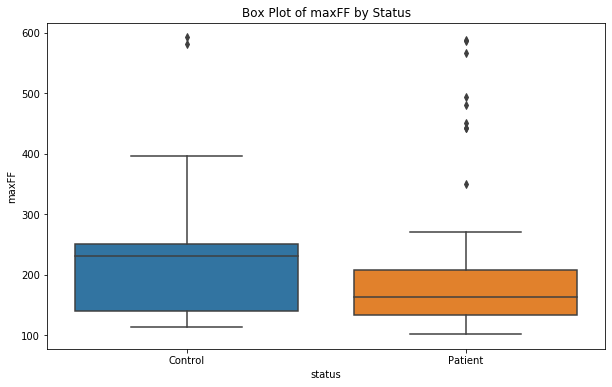

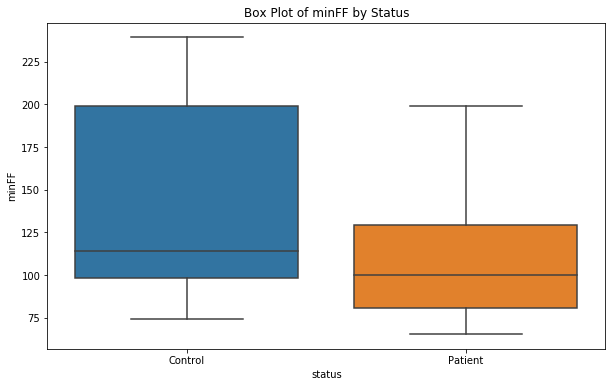

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# show our variables to plot and create boxplots
variables = ['maxFF', 'minFF']
    
for var in variables:
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x='status', y=var, data=reduced_parkinsons_df)
    plt.title(f'Box Plot of {var} by Status')

    # titles needed for 0 as 'Control' and 1 as 'Patient' for clarity
    ax.set_xticklabels(['Control', 'Patient'])
    
    plt.show()


**Here is a breakdown of the potential outliers for both control and patient groups for minFF and maxFF**

1. minFF:
- The median value for minFF is lower for patients (status 1) compared to controls (status 0), which suggests that patients with Parkinson's disease have a lower minimum pitch of voice.
- The interquartile range is similar between the two groups, indicating a comparable spread of data around the median.
- **There are no visible outliers in the control group**, while the **patient group appears to have a couple of points outside the upper whisker**, suggesting the presence of high outliers. This might indicate that while most patients have a consistently lower minFF, there are a few with higher values.

2. maxFF:
- **There is a considerable number of outliers in both groups, more so in the control group.**
- The control group has a higher median and more variability as indicated by a longer IQR.
- The presence of multiple outliers, especially in the control group, could be due to various factors, such as natural variation or perhaps anomalies in measurement.

**Conclusions** The analysis of minFF and maxFF reveals that both the minimum and maximum fundamental frequencies tend to be lower in patients with Parkinson's disease compared to control subjects. The presence of outliers in the patient group for minFF and in the control group for maxFF could be of clinical interest, as it may point to individual differences in disease impact or vocal performance among healthy subjects. These findings are consistent with the known symptoms of Parkinson's disease, which can include a reduced range and variability in vocal frequency due to rigidity and bradykinesia affecting laryngeal muscles.

**Question 4: Variance between both groups**

*We will perform Levene's test to determine if the differences in variances between the two groups are statistically significant. A low p-value in Levene's test (typically below 0.05) would indicate that there is a significant difference in variance between the two groups.*

In [15]:
from scipy.stats import levene

variables = ['maxFF', 'minFF']

for var in variables:
    control_group = reduced_parkinsons_df[reduced_parkinsons_df['status'] == 0][var]
    patient_group = reduced_parkinsons_df[reduced_parkinsons_df['status'] == 1][var]
    
    # Perform Levene's test
    stat, p = levene(control_group, patient_group)
    
    # Display the result of Levene's test
    print(f"Levene's test for {var}:")
    print(f"  Statistic: {stat:.4f}, P-value: {p:.4f}\n")

Levene's test for maxFF:
  Statistic: 0.4767, P-value: 0.4907

Levene's test for minFF:
  Statistic: 24.9246, P-value: 0.0000



**Here is a breakdown of the potential variance across both groups**

Based on the above, we got the p-value which is significantly lower than 0.05, indicating that the variances of 'minFF' are significantly different between the two groups. The high value of the test statistic confirms the strength of this result. Therefore, the variability in 'minFF' differs between controls and patients, with the patients likely exhibiting more variability.

Thus, together, for 'maxFF', both controls and patients have similar levels of variability in their voice frequency data, which suggests that Parkinson's disease may not significantly affect the variability of the maximum vocal frequency.

For 'minFF', there's a significant difference in variability between the two groups, implying that Parkinson's disease affects the minimum vocal frequency differently across patients, potentially reflecting a symptom or a consequence of the condition that impacts voice characteristics more noticeably at lower frequencies.

It seems that these findings could be valuable for clinicians or researchers focusing on speech symptoms in Parkinson's disease, as it suggests that the minimum frequency of the voice might be a more sensitive measure to differentiate between patients and controls compared to the maximum frequency.

In [16]:
from collaborator_3_Sarah import group_and_average

agg_df = group_and_average(reduced_parkinsons_df, "subject_id")

print(agg_df.head())

                 maxFF       minFF  percJitter   lShimer  status      RPDE  \
subject_id                                                                   
S01         141.312833  106.029833    0.010085  0.053932       1  0.428488   
S02         121.894333   95.413167    0.004585  0.021668       1  0.598429   
S04         216.867500   87.532333    0.004347  0.019343       1  0.521660   
S05         181.630167   86.767167    0.006247  0.043337       1  0.626723   
S06         208.264333   78.278333    0.005230  0.021367       1  0.432723   

                 DFA   spread1   spread2        D2  
subject_id                                          
S01         0.821314 -4.239926  0.296836  2.342642  
S02         0.778017 -5.420414  0.308289  2.287428  
S04         0.645843 -5.337281  0.249288  2.360638  
S05         0.695886 -4.560947  0.278482  2.787869  
S06         0.719675 -6.223537  0.228296  2.440360  


In [17]:
agg_df.shape

(32, 10)

*As we see, the total number of observations we have is 32 after aggregating each variable of the cleaned_dataframe across trials for each subject.*

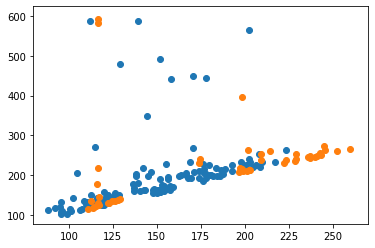

In [18]:
from colaborator_two_anton import scat_plt

scat_plt(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], df['status'])

In [19]:
'''
Based on the variable ‘name’ write some code in the main that creates two new columns
in the dataframe: one displaying the subject id (S1, S2, S3…) and another displaying the
trial (t1, t2, t3, …, t6 or t7 in some cases). Remover the column name from the
dataframe.

'''

df[['subject_id', 'trial']] = df['name'].str.split('_', n=1, expand=True)

df['trial'] = df['trial'].str.split('_', n=1, expand=True)[1]

df = df.drop(columns=['name'])

df.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id,trial
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,phon,S01_1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,phon,S01_2
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,phon,S01_3
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,phon,S01_4
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,phon,S01_5


MDVP:Fo(Hz) MDVP:Fhi(Hz)


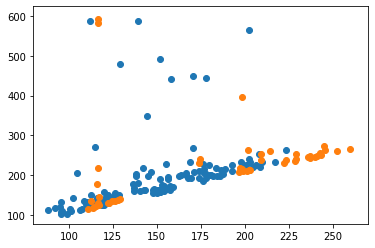

MDVP:Fo(Hz) MDVP:Flo(Hz)


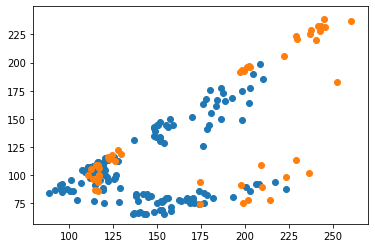

MDVP:Fhi(Hz) MDVP:Flo(Hz)


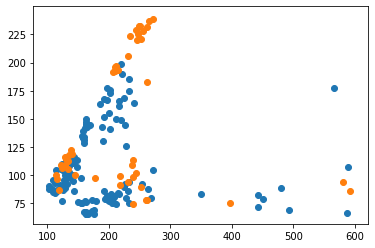

MDVP:Jitter(Abs) MDVP:RAP


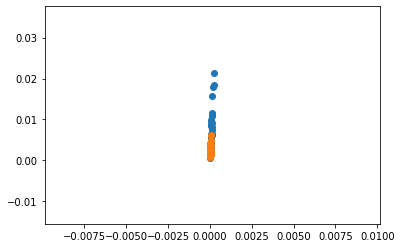

MDVP:Jitter(Abs) MDVP:PPQ


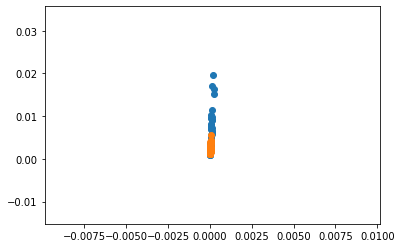

MDVP:Jitter(Abs) Jitter:DDP


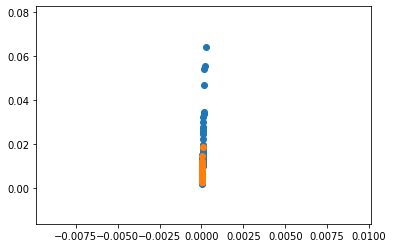

MDVP:RAP MDVP:PPQ


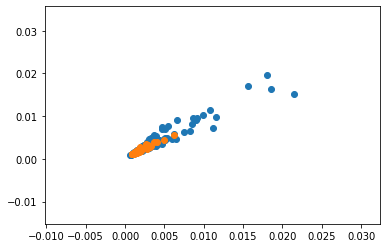

MDVP:RAP Jitter:DDP


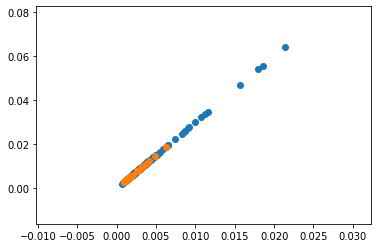

MDVP:PPQ Jitter:DDP


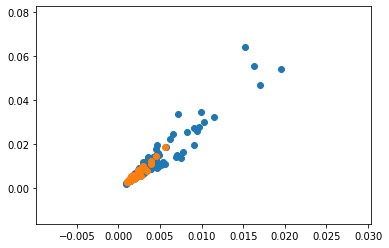

MDVP:Shimmer MDVP:Shimmer(dB)


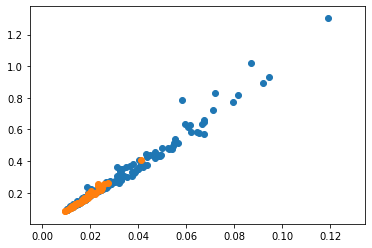

MDVP:Shimmer Shimmer:APQ3


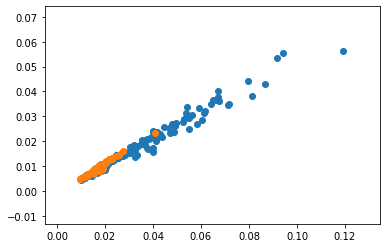

MDVP:Shimmer Shimmer:APQ5


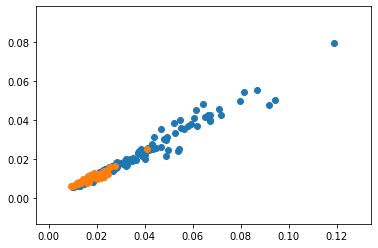

MDVP:Shimmer MDVP:APQ


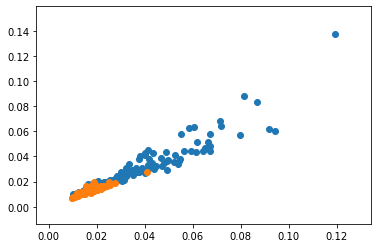

MDVP:Shimmer Shimmer:DDA


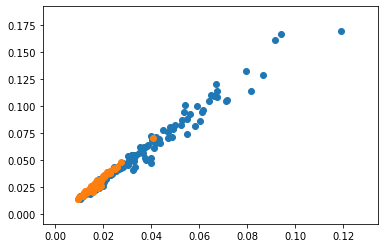

MDVP:Shimmer(dB) Shimmer:APQ3


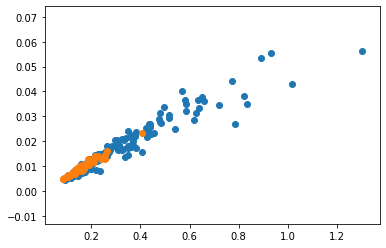

MDVP:Shimmer(dB) Shimmer:APQ5


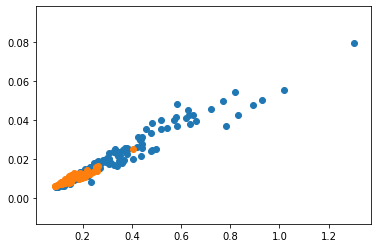

MDVP:Shimmer(dB) MDVP:APQ


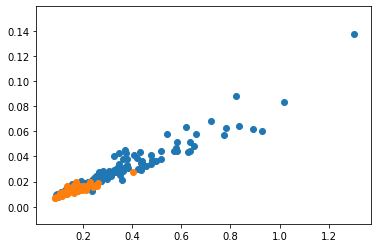

MDVP:Shimmer(dB) Shimmer:DDA


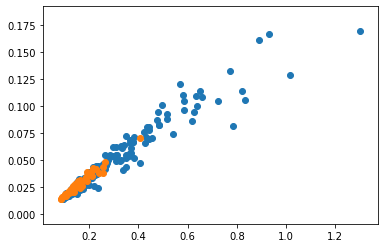

Shimmer:APQ3 Shimmer:APQ5


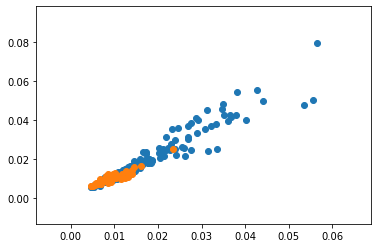

Shimmer:APQ3 MDVP:APQ


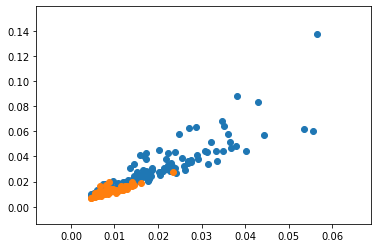

Shimmer:APQ3 Shimmer:DDA


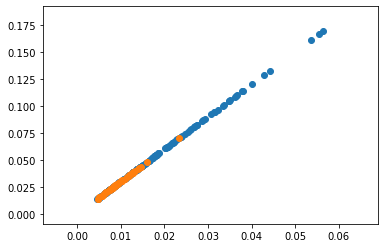

Shimmer:APQ5 MDVP:APQ


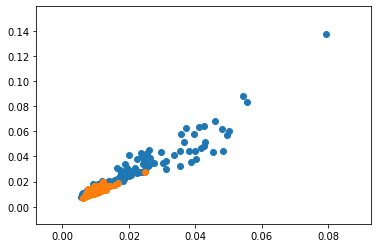

Shimmer:APQ5 Shimmer:DDA


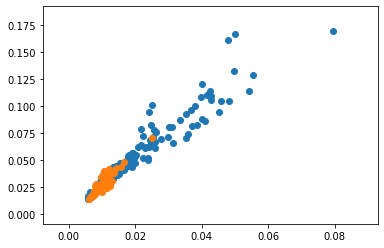

MDVP:APQ Shimmer:DDA


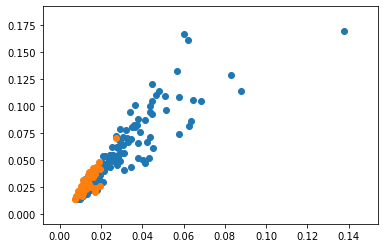

In [20]:
from collaborator_3_Sarah import plot_correlation
import itertools
from itertools import chain, combinations
shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']
jitter = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
fun_freq = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

plot_correlation(fun_freq, df)
plot_correlation(jitter, df)
plot_correlation(shimmer, df)


In [36]:
cleaned_df = df[["status","MDVP:PPQ", "Jitter:DDP",'MDVP:RAP', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA' ]]


In [37]:
agg_df = group_and_average(cleaned_df, "subject_id" )
agg_df

,MDVP:PPQ,Jitter:DDP,MDVP:RAP,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
status,,,,,,,,,,,,
0,0.002056,0.005776,0.001925,181.937771,223.636750,145.207292,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511
1,0.003900,0.011273,0.003757,145.180762,188.441463,106.893558,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027


### 4. Differentiating between controls (healthy subjects) and patients

In [41]:
from colaborator_two_anton import normalize
from sklearn.preprocessing import *

df_znorm = normalize(agg_df, 0)
df_znorm.head()

df_mmnorm = normalize(agg_df, 1)
df_mmnorm.head()

ValueError: '0' is not a supported norm

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collaborator_3_Sarah import *

knn_classification(df_mmnorm)


NameError: name 'df_mmnorm' is not defined

In [ ]:
knn_classification(df_znorm)

In [ ]:
knn_classification(cleaned_df)

In [ ]:
# The result from the max-min normalization and the z-score normalization are very similar to each other and both show the best result
# compared to the un-normalized one. The accuracy scores from the normalized dataframes are significantly higher as well. 